<font color= 'yellow'> loading dataset

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Temp_and_rain.csv to Temp_and_rain (3).csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(data_to_load['Temp_and_rain.csv']))
df.head()

,tem,Month,Year,rain,Date
0,16.9760,1,1901,18.5356,1-Jan-01
1,19.9026,2,1901,16.2548,1-Feb-01
2,24.3158,3,1901,70.7981,1-Mar-01
3,28.1834,4,1901,66.1616,1-Apr-01
4,27.8892,5,1901,267.2150,1-May-01


<font color= 'yellow'> checking null values

In [ ]:
df.isnull().sum()

tem      0
Month    0
Year     0
rain     0
Date     0
dtype: int64

<font color= 'yellow'> Checking correlation

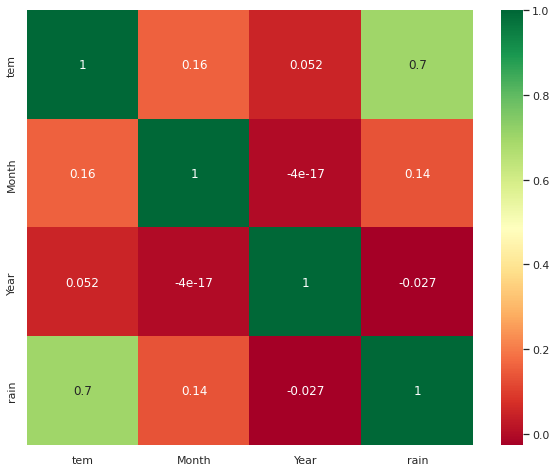

<Figure size 1080x720 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.subplots(figsize=(10,8))
heat_plot = sns.heatmap(df.corr(method='pearson'),annot=True, cmap= "RdYlGn")
plt.figure()
plt.show()

<font color= 'yellow'> Splitting dataset into Feature and target based on correlation 

In [ ]:
X= df.drop(columns=['rain', 'Year', 'Date'])
y= df['rain']

In [ ]:
plotting_y= df['rain'][1300:]
actual_rainfall=[]

for i in plotting_y:
  actual_rainfall.append(i)

<font color= 'yellow'> Scaling data

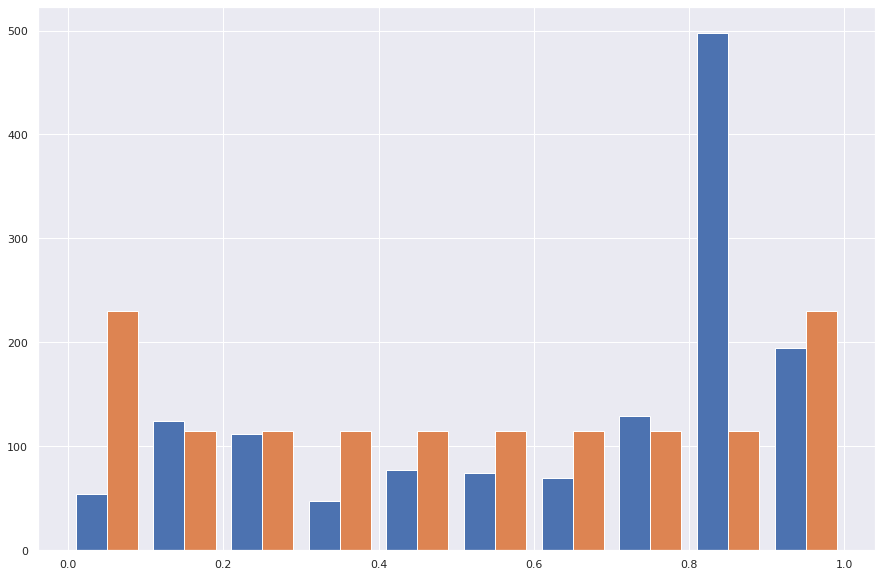

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler1= MinMaxScaler()
minMax_scaled_X= scaler1.fit_transform(X)
plt.hist(minMax_scaled_X)
plt.show()

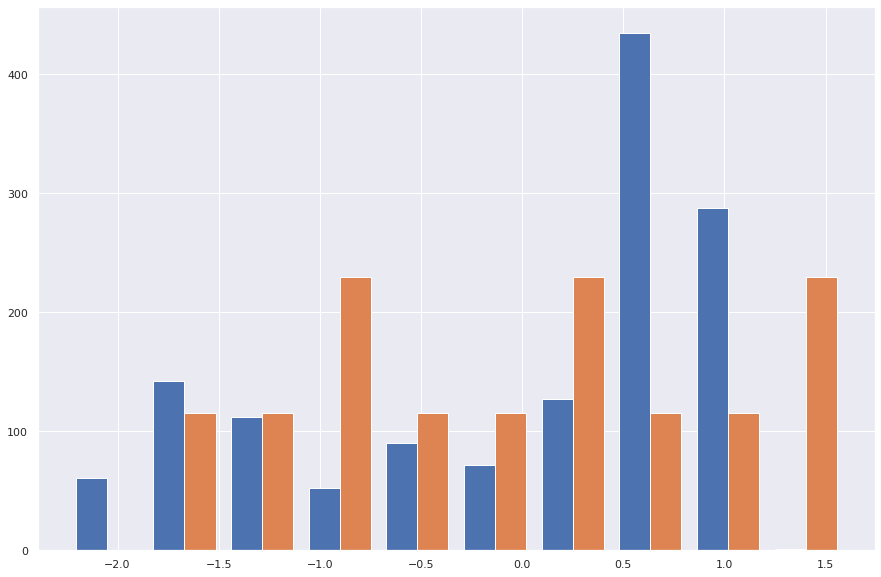

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler2= StandardScaler()
stand_scaled_X= scaler2.fit_transform(X)
plt.hist(stand_scaled_X)
plt.show()

<font color= 'yellow'> plotting graphs

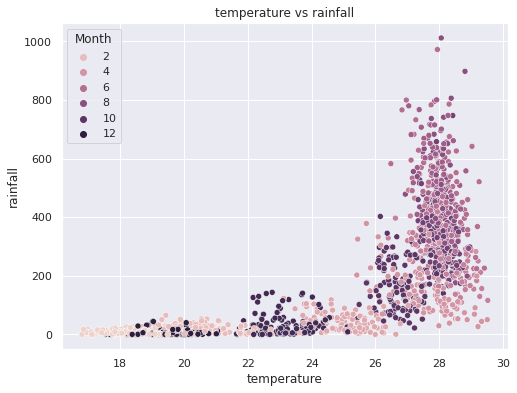

<Figure size 1080x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,6))

plt.title('temperature vs rainfall')
sns.scatterplot(x=df['tem'],y=df['rain'],hue=df['Month'])
plt.xlabel('temperature')
plt.ylabel('rainfall')

plt.show()
plt.tight_layout()

<font color= 'yellow'> <h2> Linear Regression

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

<font color= 'yellow'> Splitting training and testing data

In [ ]:
X_train= minMax_scaled_X[0:1300]
y_train= y[0:1300]

X_test= minMax_scaled_X[1300:]
y_test= y[1300:]

<font color= 'yellow'> training the model

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

<font color= 'yellow'> prediction

In [ ]:
linear_reg_prediction= lm.predict(X_test)

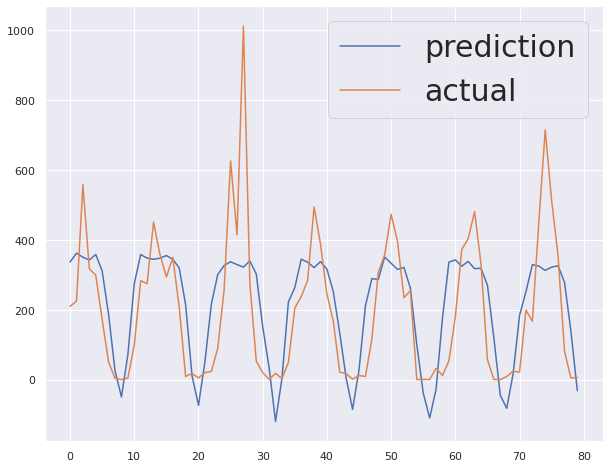

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(linear_reg_prediction, label="prediction")
plt.plot(actual_rainfall, label = "actual")

plt.legend(fontsize=30)

<font color= 'yellow'> error calculation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mse_linear_reg= mean_squared_error(y_test, linear_reg_prediction)
print("mse of linear regression: ", mse_linear_reg)

mae_linear_reg= mean_absolute_error(y_test, linear_reg_prediction)
print("mae of linear regression: ", mae_linear_reg)


mse of linear regression:  22679.173451687988
mae of linear regression:  111.96389530652405


<font color= 'yellow'> <h2> polynomial regression

In [ ]:
lin_reg = LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)

X_train_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_train_poly, y_train)


PolynomialFeatures(degree=4)

In [ ]:
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
X_test_poly= poly_reg.fit_transform(X_test)

In [ ]:
polynomial_reg_prediction= lin_reg.predict(X_test_poly)

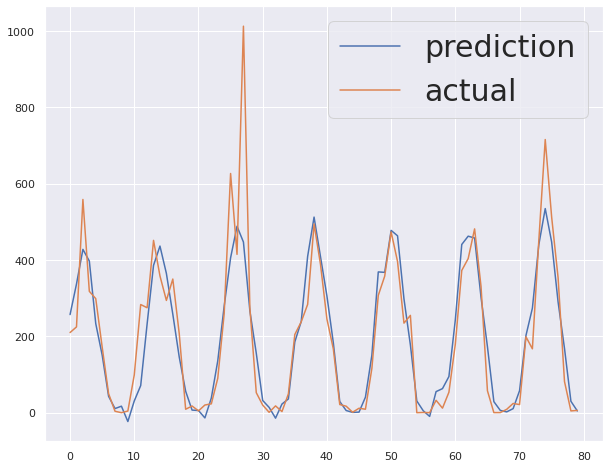

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(polynomial_reg_prediction, label="prediction")
plt.plot(actual_rainfall, label = "actual")

plt.legend(fontsize=30)

In [ ]:
mse_poly_reg= mean_squared_error(y_test, polynomial_reg_prediction)
print("mse of polynomial regression: ", mse_poly_reg)

mae_poly_reg= mean_absolute_error(y_test, polynomial_reg_prediction)
print("mae of polynomial regression: ", mae_poly_reg)

mse of polynomial regression:  8163.430275036185
mae of polynomial regression:  52.90790182684414


<font color = "yellow"> <h2> Decision Tree

In [ ]:
X= df.drop(columns=['rain', 'Year', 'Date'])
y= df['rain']

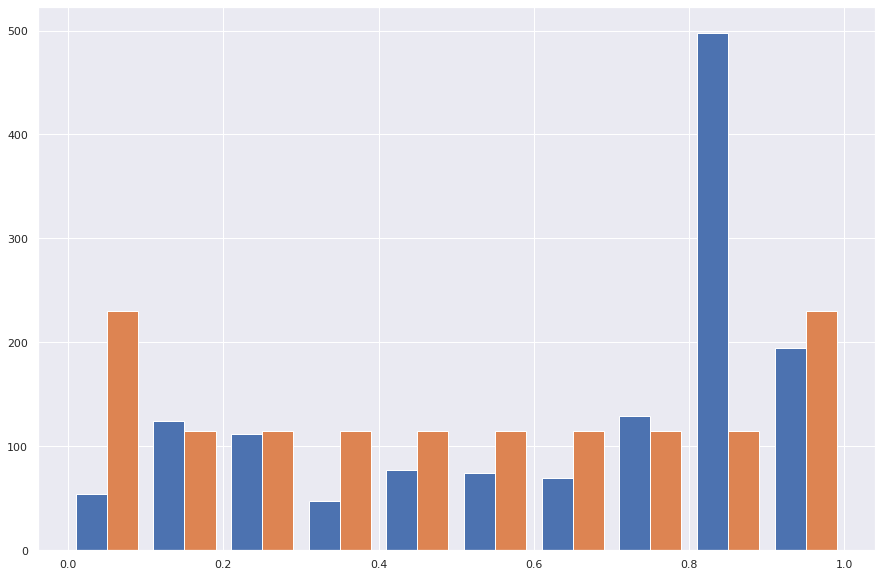

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler1= MinMaxScaler()
minMax_scaled_X= scaler1.fit_transform(X)
plt.hist(minMax_scaled_X)
plt.show()

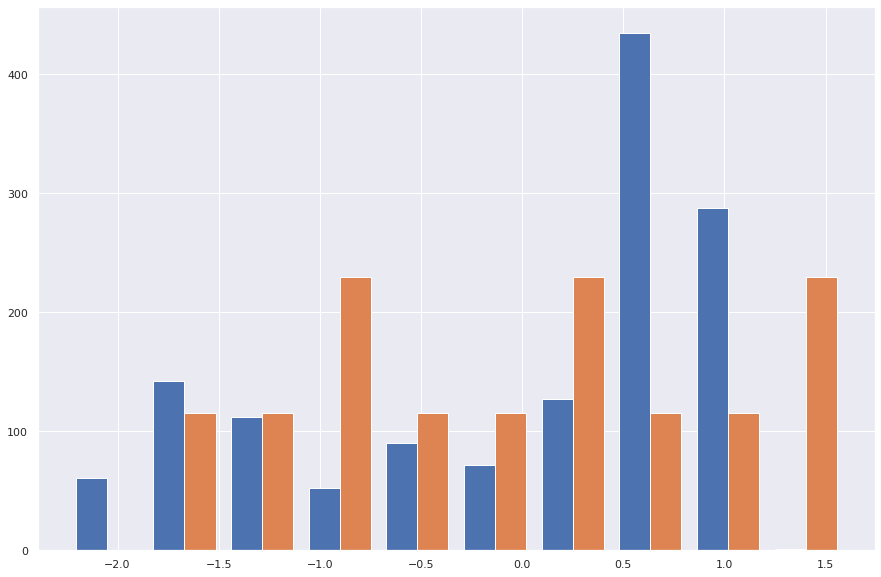

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler2= StandardScaler()
stand_scaled_X= scaler2.fit_transform(X)
plt.hist(stand_scaled_X)
plt.show()

In [ ]:
X_train= minMax_scaled_X[0:1300]
y_train= y[0:1300]

X_test= minMax_scaled_X[1300:]
y_test= y[1300:]

In [ ]:
X_train_std= minMax_scaled_X[0:1300]
y_train_std= y[0:1300]

X_test_std= minMax_scaled_X[1300:]
y_test_std= y[1300:]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
tree_model = DecisionTreeRegressor()

In [ ]:
tree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
tree_model_prediction= tree_model.predict(X_test) 

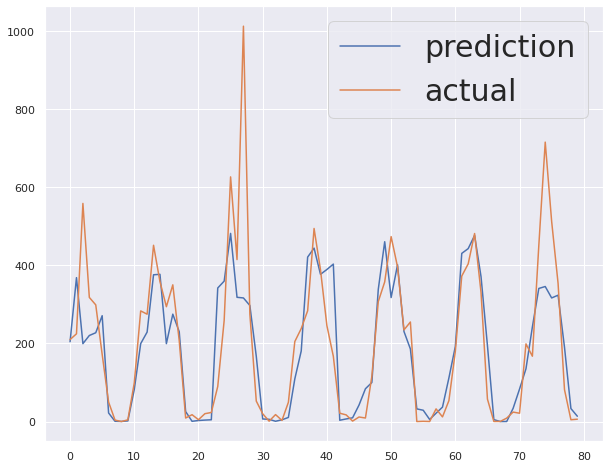

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(tree_model_prediction, label="prediction")
plt.plot(actual_rainfall, label = "actual")

plt.legend(fontsize=30)

In [ ]:
mse_tree= mean_squared_error(y_test, tree_model_prediction)
print("mse of polynomial regression: ", mse_tree)

mae_tree= mean_absolute_error(y_test, tree_model_prediction)
print("mae of polynomial regression: ", mae_tree)

mse of polynomial regression:  15175.785073185127
mae of polynomial regression:  70.00397875


<font color= "yellow"> <h2> Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
forest_model= RandomForestRegressor(max_depth= 7, criterion= "squared_error", n_estimators= 6, min_samples_split= 5, max_features= 2, random_state= 0)

In [ ]:
forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=2, min_samples_split=5,
                      n_estimators=6, random_state=0)

In [ ]:
forest_prediction= forest_model.predict(X_test)

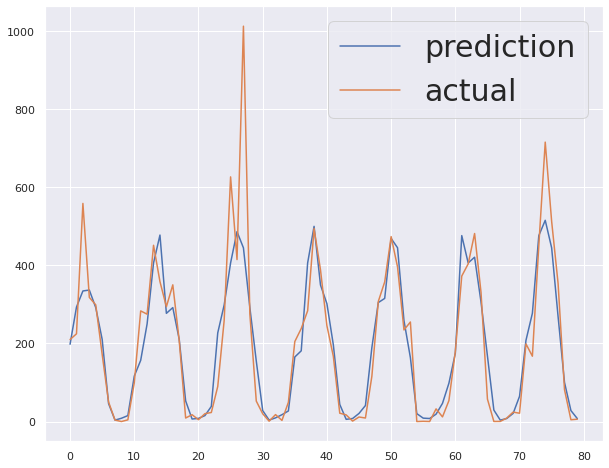

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(forest_prediction, label="prediction")
plt.plot(actual_rainfall, label = "actual")

plt.legend(fontsize=30)

In [ ]:
mse_forest= mean_squared_error(y_test, forest_prediction)
print("mse of Random forest regression: ", mse_forest)

mae_forest= mean_absolute_error(y_test, forest_prediction)
print("mae of Random Forest regression: ", mae_forest)

mse of Random forest regression:  8111.138598791238
mae of Random Forest regression:  48.32391451442045


<font color ="yellow"> <h1> Forecasting

In [ ]:
data_to_load = files.upload()

Saving Temp_and_rain.csv to Temp_and_rain (4).csv


In [ ]:
df = pd.read_csv(io.BytesIO(data_to_load['Temp_and_rain.csv']))
df.head()

,tem,Month,Year,rain,Date
0,16.9760,1,1901,18.5356,1-Jan-01
1,19.9026,2,1901,16.2548,1-Feb-01
2,24.3158,3,1901,70.7981,1-Mar-01
3,28.1834,4,1901,66.1616,1-Apr-01
4,27.8892,5,1901,267.2150,1-May-01


In [ ]:
n_future= 60
train_dates = pd.to_datetime(df['Date'])

In [ ]:
train_dates

0      2001-01-01
1      2001-02-01
2      2001-03-01
3      2001-04-01
4      2001-05-01
          ...    
1375   2015-08-01
1376   2015-09-01
1377   2015-10-01
1378   2015-11-01
1379   2015-12-01
Name: Date, Length: 1380, dtype: datetime64[ns]

In [ ]:
list(train_dates)[-1]

Timestamp('2015-12-01 00:00:00')

In [ ]:
forecast_preiod_dates_random_forest= pd.date_range(list(train_dates)[-1], periods= n_future, freq= '1m' ).tolist()

In [ ]:
forecast_preiod_dates_random_forest

[Timestamp('2015-12-31 00:00:00', freq='M'),
 Timestamp('2016-01-31 00:00:00', freq='M'),
 Timestamp('2016-02-29 00:00:00', freq='M'),
 Timestamp('2016-03-31 00:00:00', freq='M'),
 Timestamp('2016-04-30 00:00:00', freq='M'),
 Timestamp('2016-05-31 00:00:00', freq='M'),
 Timestamp('2016-06-30 00:00:00', freq='M'),
 Timestamp('2016-07-31 00:00:00', freq='M'),
 Timestamp('2016-08-31 00:00:00', freq='M'),
 Timestamp('2016-09-30 00:00:00', freq='M'),
 Timestamp('2016-10-31 00:00:00', freq='M'),
 Timestamp('2016-11-30 00:00:00', freq='M'),
 Timestamp('2016-12-31 00:00:00', freq='M'),
 Timestamp('2017-01-31 00:00:00', freq='M'),
 Timestamp('2017-02-28 00:00:00', freq='M'),
 Timestamp('2017-03-31 00:00:00', freq='M'),
 Timestamp('2017-04-30 00:00:00', freq='M'),
 Timestamp('2017-05-31 00:00:00', freq='M'),
 Timestamp('2017-06-30 00:00:00', freq='M'),
 Timestamp('2017-07-31 00:00:00', freq='M'),
 Timestamp('2017-08-31 00:00:00', freq='M'),
 Timestamp('2017-09-30 00:00:00', freq='M'),
 Timestamp

<font color= "yellow"> Forecasting procedure

In [ ]:
forecast_forest= forest_model.predict(X_test[-n_future:])

In [ ]:
import numpy as np
forecast_copies_forest= np.repeat(forecast_forest, X.shape[1], axis=-1 )

In [ ]:
#y_pred_future_forest= scaler_y.inverse_transform(forecast_copies_forest)[:,0]

In [ ]:
forecast_dates_forest= []
for time_i in forecast_preiod_dates_random_forest:
  forecast_dates_forest.append(time_i.date())

In [ ]:
df_forecast_randomForest= pd.DataFrame({'Date': np.array(forecast_dates_forest), 'rain': forecast_forest})
df_forecast_randomForest['Date']= pd.to_datetime(df_forecast_randomForest['Date'])

In [ ]:
original= df[['Date', 'rain']]
original['Date']= pd.to_datetime(original['Date'])
original= original.loc[original['Date'] <= '2015-12-31']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
original= original.loc[original['Date'] >= '2005-12-31']

In [ ]:
original

,Date,rain
120,2011-01-01,14.88780
121,2011-02-01,5.67389
122,2011-03-01,53.25310
123,2011-04-01,120.23700
124,2011-05-01,326.94300
...,...,...
1375,2015-08-01,512.12700
1376,2015-09-01,353.86900
1377,2015-10-01,81.59940
1378,2015-11-01,4.60815


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'forecasting rainfall amount')

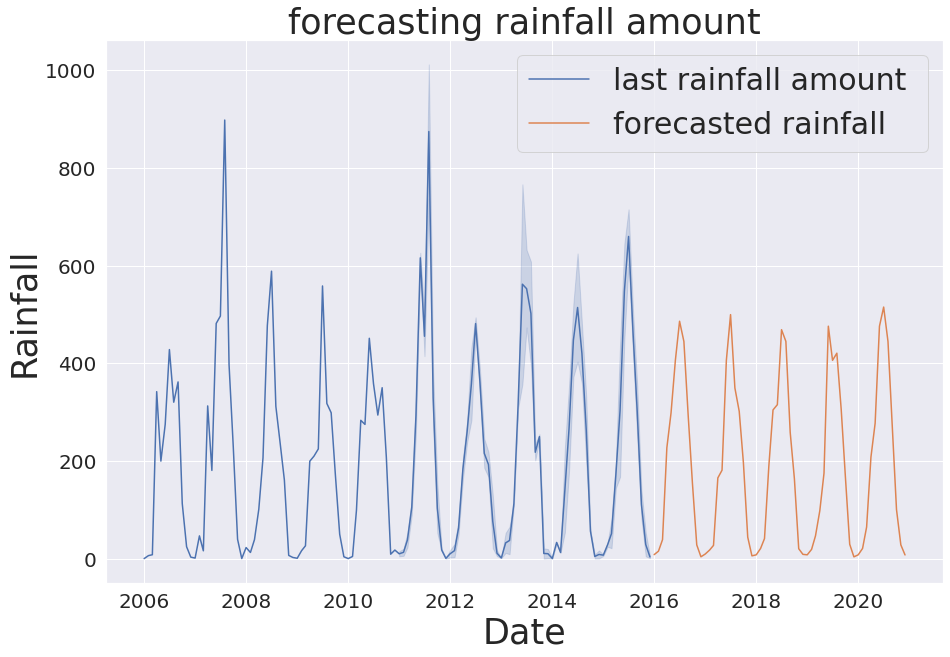

In [ ]:
import seaborn as sns
sns.set(rc={"figure.figsize":(15, 10)})

sns.lineplot(original['Date'], original['rain'])
sns.lineplot(df_forecast_randomForest['Date'], df_forecast_randomForest['rain'])

plt.xlabel("Date", fontsize= 35)
plt.ylabel("Rainfall", fontsize= 35)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.legend(labels=["last rainfall amount ","forecasted rainfall"], fontsize= 30)
plt.title("forecasting rainfall amount", fontsize= 35)